In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import lasso_path, enet_path
from sklearn.metrics import mean_squared_error, r2_score

from scipy.optimize import curve_fit

In [33]:
plt.rcParams['figure.figsize'] = [15, 10]

In [34]:
# data = pd.read_csv('test_data.csv', index_col='IDX')
# data.DATES = pd.to_datetime(data.DATES, format='%Y-%m-%d')
data = pd.read_csv('t1_v2.csv', index_col='IDX')
data.DATES = pd.to_datetime(data.DATES, format='%d-%b-%Y')

In [35]:
data.shape

(406, 3)

In [36]:
data.describe()

,VOL,DURATION
count,406.000000,406.000000
mean,13103.371921,79.536798
std,10759.021806,50.777407
min,614.000000,1.930000
25%,8465.250000,39.137500
50%,10799.000000,82.480000
75%,13466.250000,102.185000
max,84596.000000,323.760000


In [37]:
data.head()

,DATES,VOL,DURATION
IDX,,,
1,2017-06-29,1498,4.14
2,2017-06-30,947,3.53
3,2017-07-01,1503,4.91
4,2017-07-02,1992,5.73
5,2017-07-03,1274,3.59


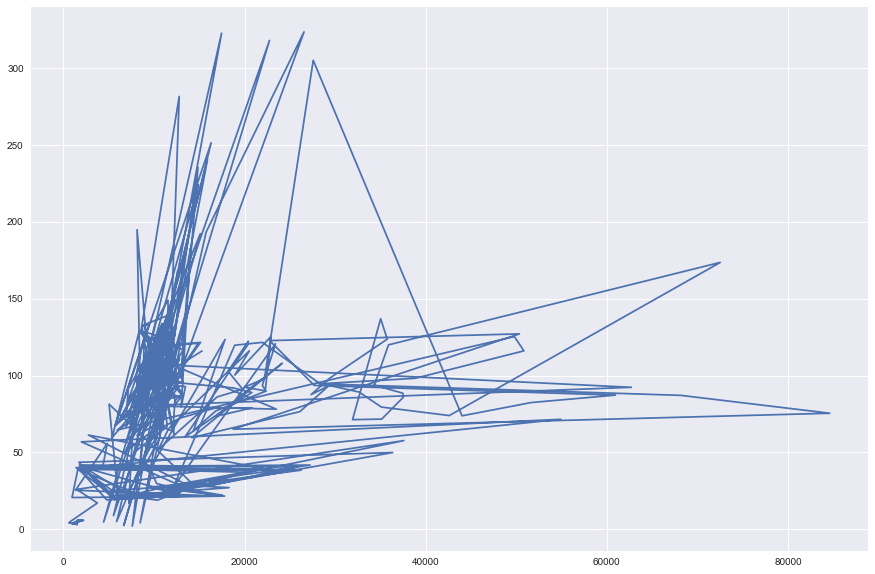

In [38]:
# plt.scatter(data.VOL, data.DURATION)
plt.plot(data.VOL.values, data.DURATION.values)
plt.show()

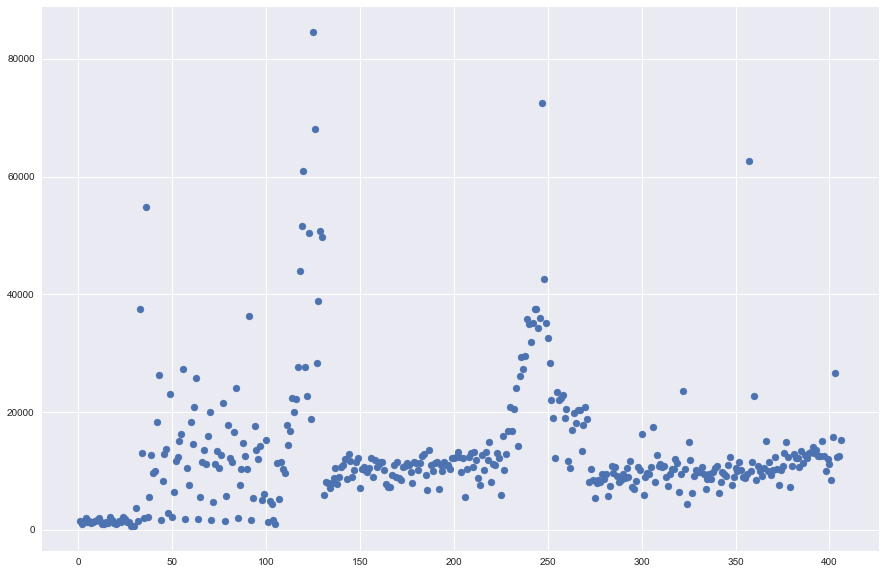

In [39]:
plt.scatter(data.index, data.VOL)
plt.show()

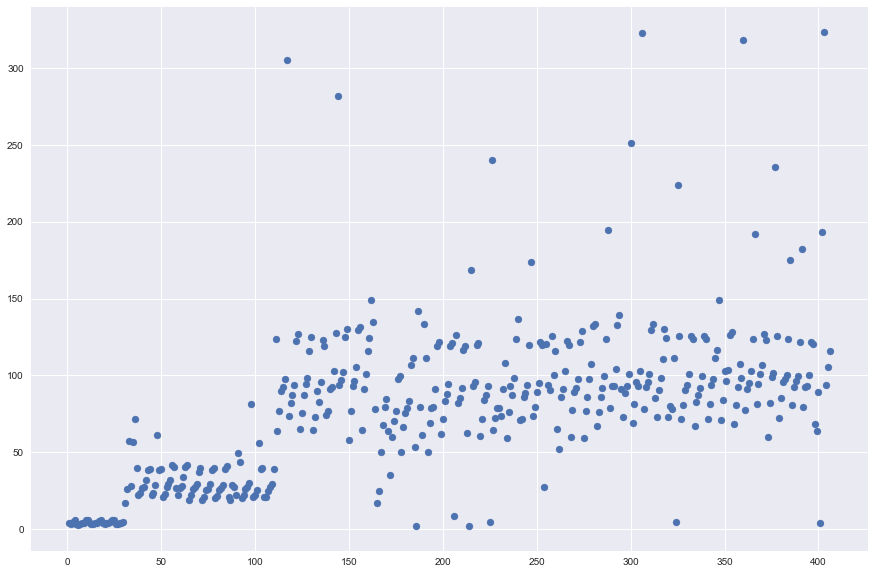

In [40]:
plt.scatter(data.index, data.DURATION)
plt.show()

In [41]:
X = data.drop(['DATES','DURATION'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, data.DURATION, test_size=0.25,random_state=5)

# Ordinary Least Squares

In [42]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
y_pred = lm.predict(x_test)

In [44]:
print ('Estimated incercept coefficient: ', lm.intercept_)

Estimated incercept coefficient:  60.02962712028124


In [45]:
print ('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  1


In [46]:
print('Linear Regression Coef: ',lm.coef_)

Linear Regression Coef:  [0.00150244]


In [47]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2077.63


In [48]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.06


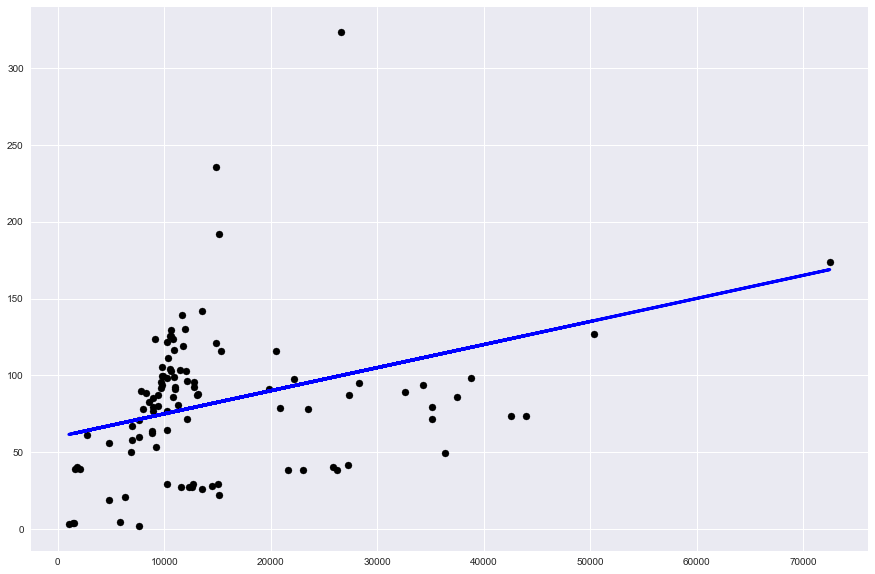

In [49]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())

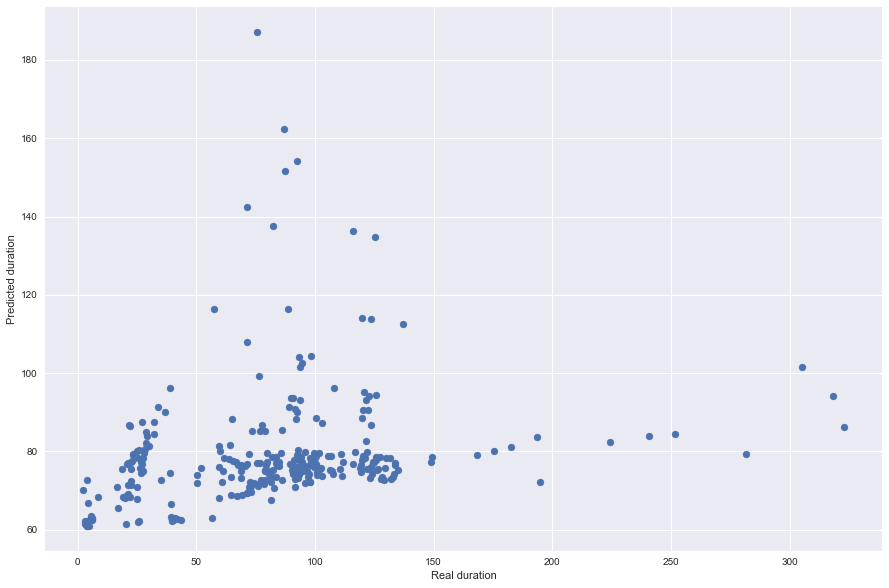

In [50]:
plt.scatter(y_train, lm.predict(x_train))
plt.xlabel("Real duration")
plt.ylabel("Predicted duration");

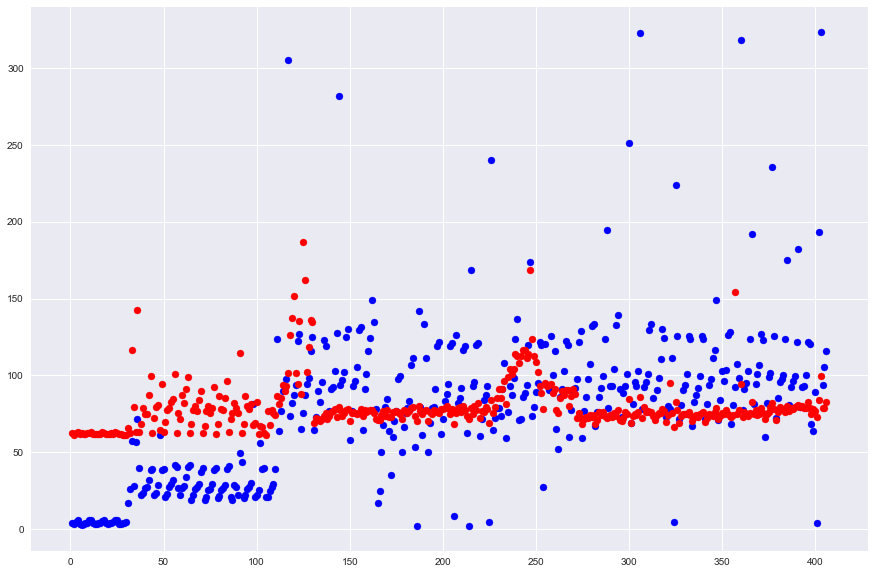

In [51]:
plt.scatter(data.index, data.DURATION,color='blue')
plt.scatter(data.index, lm.predict(X),color='red')
plt.show()

# Ridge Regression

In [52]:
reg = Ridge(alpha = .5)
reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
print('Ridge Regression Coef: ',reg.coef_)

Ridge Regression Coef:  [0.00150244]


In [54]:
print ('Estimated incercept coefficient: ', reg.intercept_)

Estimated incercept coefficient:  60.029627120565486


In [55]:
reg_y_pred = reg.predict(x_test)

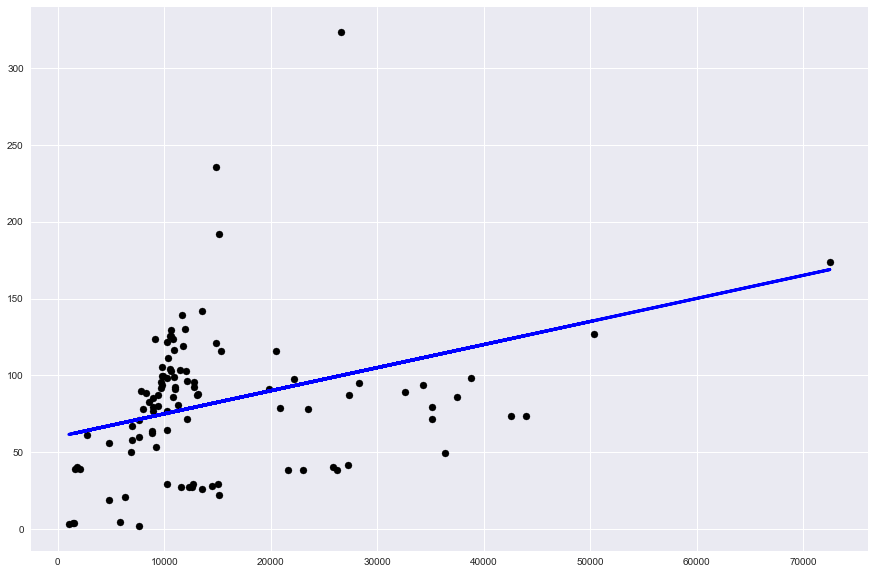

In [56]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, reg_y_pred, color='blue', linewidth=3)

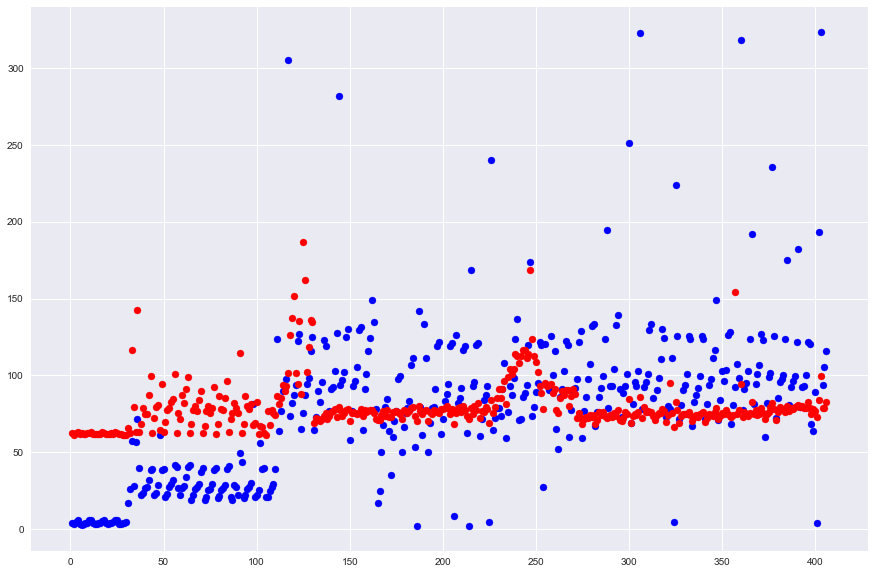

In [57]:
plt.scatter(data.index, data.DURATION,color='blue')
plt.scatter(data.index, reg.predict(X),color='red')
plt.show()

In [58]:
n_alphas = 200
# alphas = np.logspace(-10, -2, n_alphas)
alphas = np.logspace(-1, 20, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

In [59]:
coefs

[array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.00433979]),
 array([0.

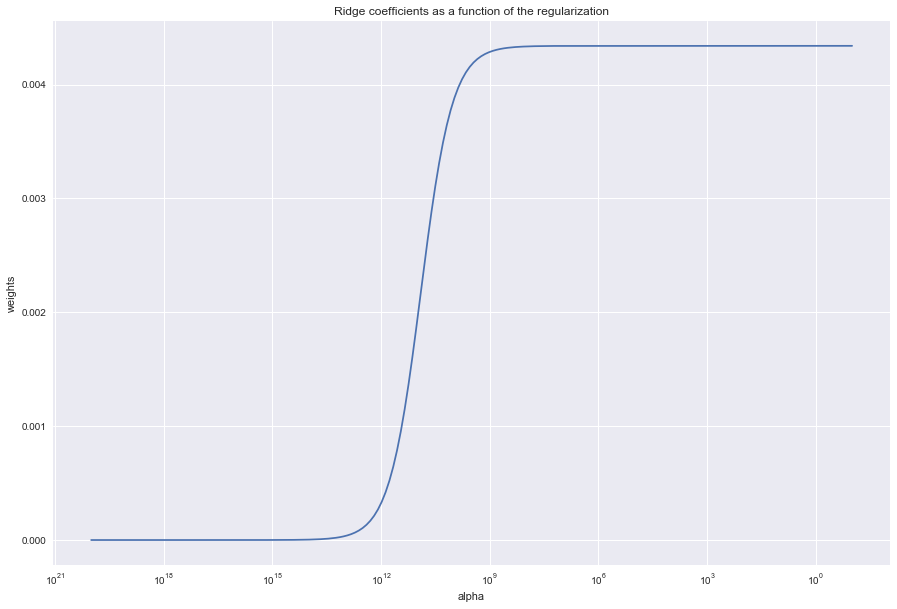

In [60]:
# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Lasso and Elastic Net

# Scipy CurveFit test

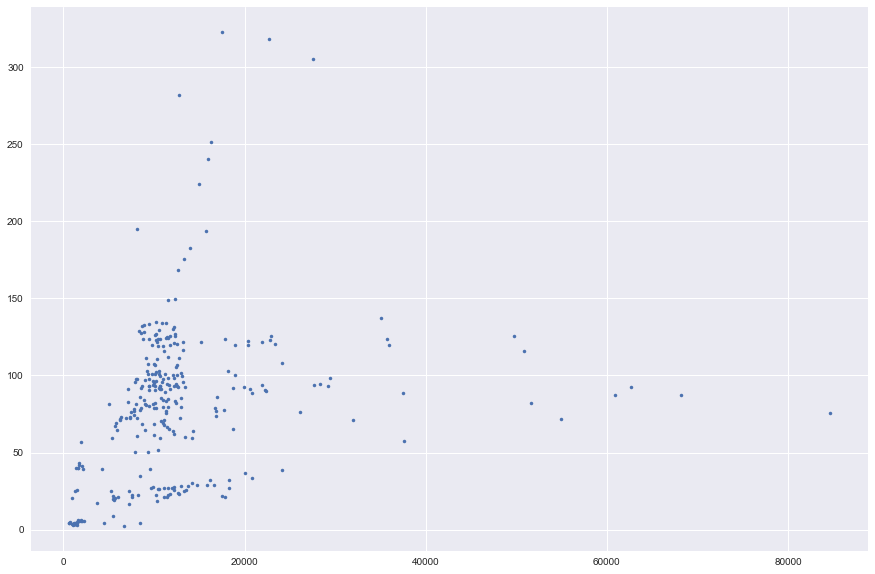

In [61]:
plt.plot(x_train, y_train,'.')

In [97]:
def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, x_train.to_numpy().flatten(), y_train.values)

In [101]:
popt

array([1.50243637e-03, 6.00296269e+01])

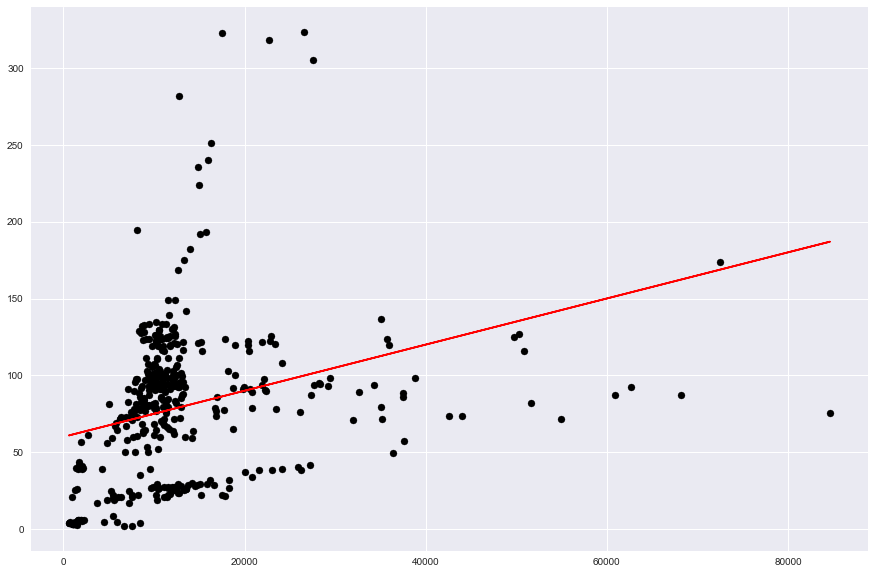

In [114]:
plt.scatter(data.VOL, data.DURATION,  color='black')
plt.plot(x_train.to_numpy().flatten(), line(x_train.to_numpy().flatten(), *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

In [110]:
def func1(x, a, b, c):
    return a * np.exp(-b * x) + c

popt1, pcov1 = curve_fit(func1, x_train.to_numpy().flatten(), y_train.values)
popt1

array([ 1.        ,  1.        , 78.75470395])

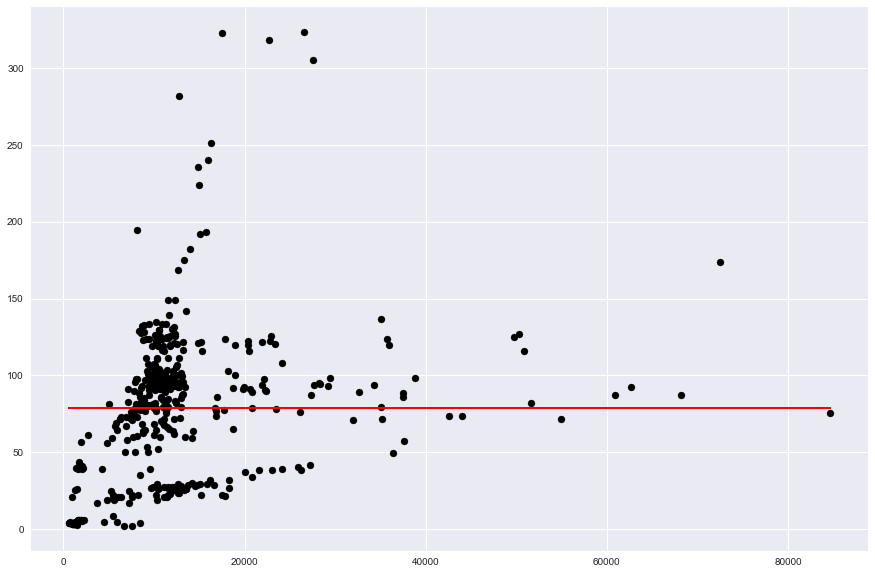

In [115]:
plt.scatter(data.VOL, data.DURATION,  color='black')
plt.plot(x_train.to_numpy().flatten(), func1(x_train.to_numpy().flatten(), *popt1), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))

,VOL
IDX,
1,1498
2,947
3,1503
4,1992
5,1274
6,1550
7,1075
8,1352
9,1482
